In [10]:
import torch
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("USING device :",device)
print(torch.cuda.get_device_name(0))    

USING device : cuda
NVIDIA A100-SXM4-80GB


In [11]:
import os


# training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
# testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

data_path = r"../datasets/office31"
all_domains = ["amazon", "dslr", "webcam"]
all_classes = ["back_pack", "bike", "bike_helmet", "bookcase", "bottle", "calculator", "desk_chair", "desk_lamp", \
               "desktop_computer", "file_cabinet", "headphones", "keyboard", "laptop_computer", "letter_tray", "mobile_phone", \
                "monitor", "mouse", "mug", "paper_notebook", "pen", "phone", "printer", "projector", "punchers", \
                "ring_binder", "ruler", "scissors", "speaker", "stapler", "tape_dispenser", "trash_can"]
train_domains = all_domains[:2]
test_domains = all_domains[2:]
train_classes = all_classes[:29]
test_classes = all_classes[29:]


# for item in os.listdir(training_data):
#     item_path = os.path.join(training_data, item)
#     if os.path.isdir(item_path):
#         class_paths.append(item_path)

# print("Classes found:", class_paths)

In [12]:
len(train_classes)

29

In [16]:
# train on 80% images, validate on 20%, test on new domain and unseen class

images = []
domain_label = []
class_label = []
for domain in train_domains:
    for clas in train_classes:
        directory_path = os.path.join(data_path, domain, clas)
        for file_name in os.listdir(directory_path):
            images.append(os.path.join(directory_path, file_name))
            domain_label.append(domain)
            class_label.append(clas)

In [ ]:
# images=[]
# labels=[]


# # 2. For each class folder, gather image file paths
# for class_path in class_paths:
#     # Loop over each file in the class folder
#     for file_name in os.listdir(class_path):
#         file_path = os.path.join(class_path, file_name)
#         # Check if it's a file (not a subdirectory)
#         if os.path.isfile(file_path):
#             images.append(file_path)

In [20]:
images[:5]

['../datasets/office31/amazon/back_pack/frame_0054.jpg',
 '../datasets/office31/amazon/back_pack/frame_0086.jpg',
 '../datasets/office31/amazon/back_pack/frame_0050.jpg',
 '../datasets/office31/amazon/back_pack/frame_0045.jpg',
 '../datasets/office31/amazon/back_pack/frame_0039.jpg']

In [ ]:
# for image_path in images:
#     # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
#     # os.path.basename(...) then gives the last part of that path (e.g., "forest")
#     class_name = os.path.basename(os.path.dirname(image_path))
#     labels.append(class_name)

# print( images[:5])

# print(labels[:5])

['/home/parul/Downloads/archive/seg_train/seg_train/buildings/4178.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13400.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/11410.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13247.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/20017.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [21]:
import cv2

img_array=[] 
for img_path in images:
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img_array.append(img)

In [22]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform them to numeric values
encoded_labels = label_encoder.fit_transform(domain_label)

# Display the encoded labels
print("Encoded Labels:", encoded_labels)

# Display the mapping from class names to integers
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 1 1 1]
Label Mapping: {'amazon': 0, 'dslr': 1}


In [45]:
type(encoded_labels)

numpy.ndarray

In [23]:
import matplotlib.pyplot as plt

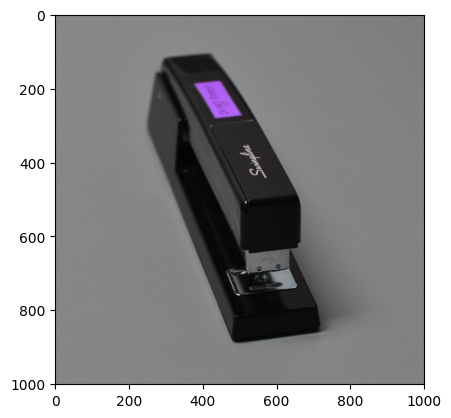

In [24]:
img=cv2.imread(images[-2])
plt.imshow(img)



In [ ]:
import numpy as np
images_np = np.array(img_array)
encoded_labels_np = np.array(encoded_labels)

# Create a random permutation of indices
indices = np.random.permutation(len(images_np))

# Use the indices to shuffle both arrays
shuffled_images = images_np[indices]
shuffled_labels = encoded_labels_np[indices]

In [ ]:
# training_images=shuffled_images
# labels_training=shuffled_labels



**PREPROCESSING TESTING DATA**

In [30]:
len(shuffled_labels) == len(shuffled_images)

True

In [31]:
training_images = shuffled_images[:2500]
training_labels = shuffled_labels[:2500]

testing_images = shuffled_images[2500:]
testing_labels = shuffled_labels[2500:]

In [ ]:
# import os

# training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
# testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

# class_paths = []

# for item in os.listdir(testing_data):
#     item_path = os.path.join(testing_data, item)
#     if os.path.isdir(item_path):
#         class_paths.append(item_path)

# print("Classes found:", class_paths)

Classes found: ['/home/parul/Downloads/archive/seg_test/seg_test/buildings', '/home/parul/Downloads/archive/seg_test/seg_test/forest', '/home/parul/Downloads/archive/seg_test/seg_test/street', '/home/parul/Downloads/archive/seg_test/seg_test/sea', '/home/parul/Downloads/archive/seg_test/seg_test/mountain', '/home/parul/Downloads/archive/seg_test/seg_test/glacier']


In [ ]:
# images=[]
# domain_labels=[]
# class_labels = []


# # 2. For each class folder, gather image file paths
# for class_path in class_paths:
#     # Loop over each file in the class folder
#     for file_name in os.listdir(class_path):
#         file_path = os.path.join(class_path, file_name)
#         # Check if it's a file (not a subdirectory)
#         if os.path.isfile(file_path):
#             images.append(file_path)

In [ ]:
# for image_path in images:
#     # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
#     # os.path.basename(...) then gives the last part of that path (e.g., "forest")
#     class_name = os.path.basename(os.path.dirname(image_path))
#     labels.append(class_name)

# print( images[:5])
# print(labels[:5])

['/home/parul/Downloads/archive/seg_test/seg_test/buildings/20186.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/21631.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/20553.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/22665.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/23297.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [ ]:
# import cv2

# img_array=[] 
# for img_path in images:
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, (128, 128))
#     img = img / 255.0
#     img_array.append(img)

In [ ]:
# from sklearn.preprocessing import LabelEncoder



# label_encoder = LabelEncoder()

# # Fit the encoder on your labels and transform them to numeric values
# encoded_labels = label_encoder.fit_transform(labels)

# # Display the encoded labels
# print("Encoded Labels:", encoded_labels)
# training_images
# # Display the mapping from class names to integers
# mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
# print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 2 2 2]
Label Mapping: {np.str_('buildings'): 0, np.str_('forest'): 1, np.str_('glacier'): 2, np.str_('mountain'): 3, np.str_('sea'): 4, np.str_('street'): 5}


In [ ]:
# images_np = np.array(img_array)
# encoded_labels_np = np.array(encoded_labels)

# # Create a random permutation of indices
# indices = np.random.permutation(len(images_np))

# # Use the indices to shuffle both arrays
# shuffled_images = images_np[indices]
# shuffled_encoded_labels = encoded_labels_np[indices]

In [ ]:
# testing_images=shuffled_images
# encoded_labels=shuffled_encoded_labels
# labels_testing=encoded_labels

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [33]:
# ---------------- Custom Dataset with Data Augmentation ----------------
# Assuming training_images and testing_images are NumPy arrays with shape (N, 128, 128, 3)
# and training_labels and testing_labels are NumPy arrays with integer labels.
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        images: NumPy array of shape (N, 128, 128, 3)
        labels: NumPy array of shape (N,)
        transform: torchvision transforms to be applied on each image
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        # Convert the NumPy image (H, W, C) to a PIL Image for transforms
        from PIL import Image
        image = Image.fromarray((image * 255).astype(np.uint8))  # if images are in [0,1]
        if self.transform:
            image = self.transform(image)
        return image, label


In [34]:
# ---------------- Define Transforms ----------------
# Training transform with data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),  # Rotate by up to 10 degrees
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # Random crop and resize back to 128x128
    transforms.ToTensor(),
    # If you used normalization during training, add it here.
    # e.g., transforms.Normalize(mean=[...], std=[...])
])

# Testing transform: only resize and convert to tensor
test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Create custom datasets
train_dataset = CustomDataset(training_images, training_labels, transform=train_transform)
test_dataset = CustomDataset(testing_images, testing_labels, transform=test_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [35]:

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (32, 128, 128)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),         # (32, 64, 64)
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),   # (64, 64, 64)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),         # (64, 32, 32)
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # (128, 32, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)          # (128, 16, 16)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        # Flatten the feature maps: alternative to x = x.view(x.size(0), -1)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

model = SimpleCNN(num_classes=6).to(device)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# Optionally, add a learning rate scheduler:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

In [37]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    # Update scheduler if using one
    scheduler.step(epoch_loss)

Epoch [1/20], Loss: 0.1790
Epoch [2/20], Loss: 0.0502
Epoch [3/20], Loss: 0.0250
Epoch [4/20], Loss: 0.0368
Epoch [5/20], Loss: 0.0397
Epoch [6/20], Loss: 0.0246
Epoch [7/20], Loss: 0.0295
Epoch [8/20], Loss: 0.0277
Epoch [9/20], Loss: 0.0226
Epoch [10/20], Loss: 0.0223
Epoch [11/20], Loss: 0.0176
Epoch [12/20], Loss: 0.0195
Epoch [13/20], Loss: 0.0207
Epoch [14/20], Loss: 0.0187
Epoch [15/20], Loss: 0.0142
Epoch [16/20], Loss: 0.0232
Epoch [17/20], Loss: 0.0182
Epoch [18/20], Loss: 0.0175
Epoch [19/20], Loss: 0.0843
Epoch 00019: reducing learning rate of group 0 to 5.0000e-04.
Epoch [20/20], Loss: 0.0166


***MODEL EVALUATION**

1. CLASSIFICATION REPORT USING SEG_TEST
2. CONFUSION MATRIX

In [40]:

class_names= train_domains

model.eval()
all_preds=[]
all_labels=[]

with torch.no_grad():
    for images,labels in test_loader:
        images=images.to(device)
        labels= labels.to(device)
        outputs= model(images)
        _,preds=torch.max(outputs,1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds=np.array(all_preds)
all_labels=np.array(all_labels)

report= classification_report(all_labels,all_preds,target_names=class_names)
print("classification report:\n",report)

classification report:
               precision    recall  f1-score   support

      amazon       1.00      1.00      1.00       526
        dslr       0.99      0.99      0.99        92

    accuracy                           1.00       618
   macro avg       0.99      0.99      0.99       618
weighted avg       1.00      1.00      1.00       618



Confusion Matrix:
 [[525   1]
 [  1  91]]


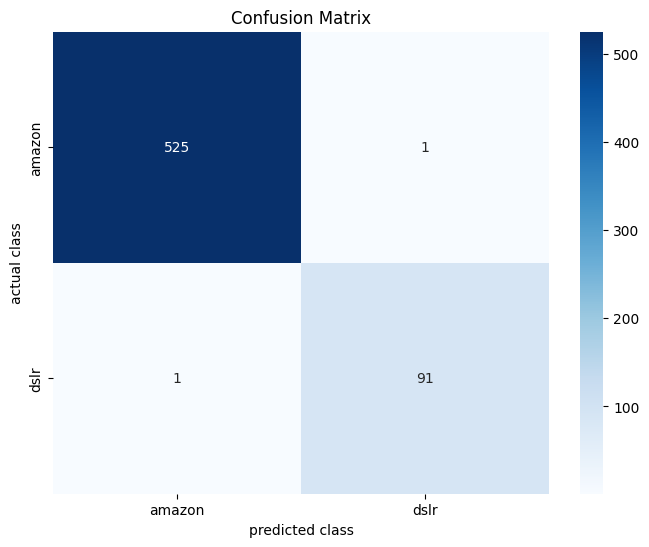

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(all_labels,all_preds)
print("Confusion Matrix:\n",conf_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.title("Confusion Matrix")
plt.show()

In [43]:
cd


/raid/infolab/bhavyakohli


Random image path: Downloads/archive/seg_pred/seg_pred/1072.jpg
Predicted label: 4
Predicted class: sea


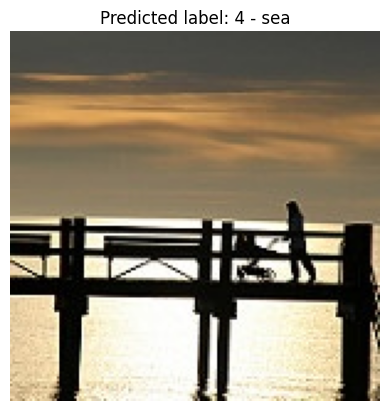

In [31]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
\
# # Path to your prediction folder
pred_folder = "Downloads/archive/seg_pred/seg_pred"

# List all image files in the folder (adjust the extensions as needed)
pred_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# # Choose a random image from the folder
random_image_path = random.choice(pred_files)
print("Random image path:", random_image_path)

# Open the image and ensure it's in RGB format
img = Image.open(random_image_path).convert("RGB")

# Define the same transformation used in training
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),          # Converts to tensor and scales pixel values to [0, 1]
    # If you applied normalization during training, add it here.
    # Example: transforms.Normalize(mean=[...], std=[...])
])

# Apply transformation and add batch dimension
img_tensor = transform(img).unsqueeze(0)

# Move model and image tensor to the device (GPU if available)
model.to(device)
img_tensor = img_tensor.to(device)

# Evaluate the model on the image
model.eval()
with torch.no_grad():AttributeError: 'CustomDataset' object has no attribute 'size'
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

predicted_label = predicted.item()

# Define the class names in the same order as during training
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class_name = class_names[predicted_label]

print("Predicted label:", predicted_label)
print("Predicted class:", predicted_class_name)


plt.imshow(img)
plt.title(f"Predicted label: {predicted_label} - {predicted_class_name}")
plt.axis('off')
plt.show()

In [44]:
class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(ImprovedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (32, 128, 128)
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.01,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),         # (32, 64, 64)
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),   # (64, 64, 64)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.01,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),         # (64, 32, 32)
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # (128, 32, 32)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.01,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)          # (128, 16, 16)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 16 * 16, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01,inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        # Flatten the feature maps: alternative to x = x.view(x.size(0), -1)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

model = ImprovedCNN(num_classes=6).to(device)

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, TensorDataset
from sklearn.model_selection import KFold
import numpy as np



k_folds = 10
num_epochs = 20

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
folds = list(kf.split(train_dataset)) 

# Create a dictionary to record validation losses for each fold across epochs.
fold_val_losses = {i: [] for i in range(k_folds)}


model = ImprovedCNN(num_classes=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)


for epoch in range(num_epochs):
    
    current_fold = epoch % k_folds  
    print(f"\n--- Epoch {epoch+1}/{num_epochs}, Using Fold {current_fold+1} as Validation ---")
    
    train_idx, val_idx = folds[current_fold]
    train_subset = Subset(train_dataset, train_idx)
    val_subset = Subset(train_dataset, val_idx)
    
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
    
    # --- Training Phase ---
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()           
        outputs = model(images)           
        loss = criterion(outputs, labels) 
        loss.backward()                   
        optimizer.step()                  
        
        running_loss += loss.item() * images.size(0)
        
    # Compute average training loss for this epoch
    train_loss = running_loss / len(train_subset)
    
    # --- Validation Phase ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(val_subset)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    scheduler.step(val_loss)
    
    # Record the validation loss for the current fold
    fold_val_losses[current_fold].append(val_loss)

# After training, compute the average validation loss for each fold.
avg_fold_losses = {fold: np.mean(losses) for fold, losses in fold_val_losses.items()}
print("\nAverage Validation Loss per Fold:")
for fold in sorted(avg_fold_losses.keys()):
    print(f"Fold {fold+1}: {avg_fold_losses[fold]:.4f}")

# Then, compute the overall average validation loss across folds.
overall_avg_val_loss = np.mean(list(avg_fold_losses.values()))
print(f"\nOverall Average Validation Loss across folds: {overall_avg_val_loss:.4f}")

/home/parul/anaconda3/envs/maitreya/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Epoch 1/20, Using Fold 1 as Validation ---
Epoch [1/20], Train Loss: 0.8557, Val Loss: 0.9422

--- Epoch 2/20, Using Fold 2 as Validation ---
Epoch [2/20], Train Loss: 0.6659, Val Loss: 0.6202

--- Epoch 3/20, Using Fold 3 as Validation ---
Epoch [3/20], Train Loss: 0.6169, Val Loss: 0.5245

--- Epoch 4/20, Using Fold 4 as Validation ---
Epoch [4/20], Train Loss: 0.5584, Val Loss: 0.7750

--- Epoch 5/20, Using Fold 5 as Validation ---
Epoch [5/20], Train Loss: 0.5448, Val Loss: 0.5497

--- Epoch 6/20, Using Fold 6 as Validation ---
Epoch [6/20], Train Loss: 0.5010, Val Loss: 0.4476

--- Epoch 7/20, Using Fold 7 as Validation ---
Epoch [7/20], Train Loss: 0.4838, Val Loss: 0.6760

--- Epoch 8/20, Using Fold 8 as Validation ---
Epoch [8/20], Train Loss: 0.4754, Val Loss: 0.4005

--- Epoch 9/20, Using Fold 9 as Validation ---
Epoch [9/20], Train Loss: 0.4516, Val Loss: 0.4238

--- Epoch 10/20, Using Fold 10 as Validation ---
Epoch [10/20], Train Loss: 0.4329, Val Loss: 0.5705

--- Ep

In [43]:

class_names= ["buildings","forest","glacier","mountain","sea","street"]

model.eval()
all_preds=[]
all_labels=[]

with torch.no_grad():
    for images,labels in test_loader:
        images=images.to(device)
        labels= labels.to(device)
        outputs= model(images)
        _,preds=torch.max(outputs,1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds=np.array(all_preds)
all_labels=np.array(all_labels)

report= classification_report(all_labels,all_preds,target_names=class_names)
print("classification report:\n",report)

        

classification report:
               precision    recall  f1-score   support

   buildings       0.77      0.92      0.84       437
      forest       0.96      0.98      0.97       474
     glacier       0.90      0.72      0.80       553
    mountain       0.84      0.81      0.83       525
         sea       0.82      0.93      0.87       510
      street       0.91      0.85      0.88       501

    accuracy                           0.86      3000
   macro avg       0.87      0.87      0.86      3000
weighted avg       0.87      0.86      0.86      3000



Confusion Matrix:
 [[402   3   2   2   6  22]
 [  5 465   1   1   1   1]
 [ 21   4 397  70  50  11]
 [ 12   5  35 427  42   4]
 [ 19   2   5   6 475   3]
 [ 63   6   0   2   3 427]]


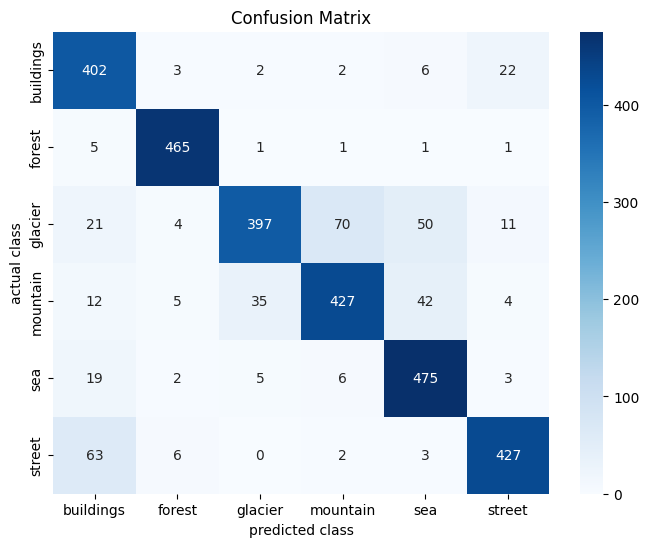

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(all_labels,all_preds)
print("Confusion Matrix:\n",conf_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.title("Confusion Matrix")
plt.show()

Random image path: Downloads/archive/seg_pred/seg_pred/18160.jpg
Predicted label: 5
Predicted class: street


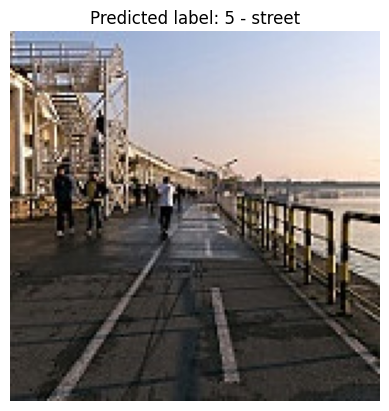

In [56]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
\
# # Path to your prediction folder
pred_folder = "Downloads/archive/seg_pred/seg_pred"

# List all image files in the folder (adjust the extensions as needed)
pred_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# # Choose a random image from the folder
random_image_path = random.choice(pred_files)
print("Random image path:", random_image_path)

# Open the image and ensure it's in RGB format
img = Image.open(random_image_path).convert("RGB")

# Define the same transformation used in training
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),          # Converts to tensor and scales pixel values to [0, 1]
    # If you applied normalization during training, add it here.
    # Example: transforms.Normalize(mean=[...], std=[...])
])


# Apply transformation and add batch dimension
img_tensor = transform(img).unsqueeze(0)

# Move model and image tensor to the device (GPU if available)
model.to(device)
img_tensor = img_tensor.to(device)

# Evaluate the model on the image
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

predicted_label = predicted.item()

# Define the class names in the same order as during training
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class_name = class_names[predicted_label]

print("Predicted label:", predicted_label)
print("Predicted class:", predicted_class_name)


plt.imshow(img)
plt.title(f"Predicted label: {predicted_label} - {predicted_class_name}")
plt.axis('off')
plt.show()